# Implementation of K-Nearest Neighbors on MNIST dataset
This is a sample implementation of k-nearest neighbors using `numpy`. The MNIST dataset is a dataset of handwritten digits, stored as 28 x 28 images. We first define functions to read from the train and test datasets, and plot an image.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import gzip

FILE_NAME = 'train-images-idx3-ubyte.gz'
IMAGE_SIZE = 28
NUM_IMAGES = 20000

def read_images(num_images=NUM_IMAGES, image_size=IMAGE_SIZE, file_name=FILE_NAME):
    f = gzip.open(file_name, 'r')
    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size * image_size)
    f.close()
    return data

FILE_NAME_Y = 'train-labels-idx1-ubyte.gz'
def read_labels(num_images=NUM_IMAGES, file_name=FILE_NAME_Y):
    f = gzip.open(file_name, 'r')
    f.read(8)
    buf = f.read(num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    f.close()
    return labels

def plot_image(data, name='Image'):
    image = np.asarray(data).reshape(28,28,1).squeeze()
    plt.imshow(image)
    plt.title(name)
    plt.show()
    
def plot_comparison(test_data, train_data):
    image_test = np.asarray(test_data).reshape(28,28,1).squeeze()
    image_train = np.asarray(train_data).reshape(28,28,1).squeeze()
    
    plt.subplot(1,2,1)
    plt.imshow(image_test)
    plt.title('Test Image')
    
    plt.subplot(1,2,2)
    plt.imshow(image_train)
    plt.title('Neares Neighbor Image')
    
    plt.show()

`classify` returns the indices of the $k$ nearest neighbors. We represent the training data as a $n$ $\times$ $(28\cdot28)$ matrix, subtract the row vector corresponding test image from all rows in the training data, and use this to calculate the Euclidean distance to each training image. Below, we show the nearest neighbor for a few examples.

In [13]:
train = read_images()
labels = read_labels()

NUM_TEST = 4000

test = read_images(num_images=NUM_TEST, file_name='t10k-images-idx3-ubyte.gz')
test_labels = read_labels(num_images=NUM_TEST, file_name='t10k-labels-idx1-ubyte.gz')

# dists[i,j] is the distance from i-th test point to j-th train point
test_sq  = np.sum(test ** 2, axis=1).reshape(NUM_TEST,1)
train_sq = np.sum(train ** 2, axis=1)
dists = np.sqrt(test_sq + train_sq - 2 * test @ train.T)

In [14]:
# classify gets the most common label in the k closest train points
def classify(k, dists):
    y_pred = np.zeros(dists.shape[0])
    
    for i in range(dists.shape[0]):
        closest_y = labels[np.argsort(dists[i])[:k]]
        y_pred[i] = np.bincount(closest_y).argmax()
        
    return y_pred

A very simple algorithm like k-nearest neighbors can produce surprisingly accurate results on the MNIST dataset:

In [15]:
for k in range(1,6):
    print('Accuracy (k = %d): %.2f' % (k, np.mean(classify(k, dists) == test_labels)))

Accuracy (k = 1): 0.93
Accuracy (k = 2): 0.93
Accuracy (k = 3): 0.94
Accuracy (k = 4): 0.94
Accuracy (k = 5): 0.94


Below, we see the test images in the first row, and their nearest neighbors in the second

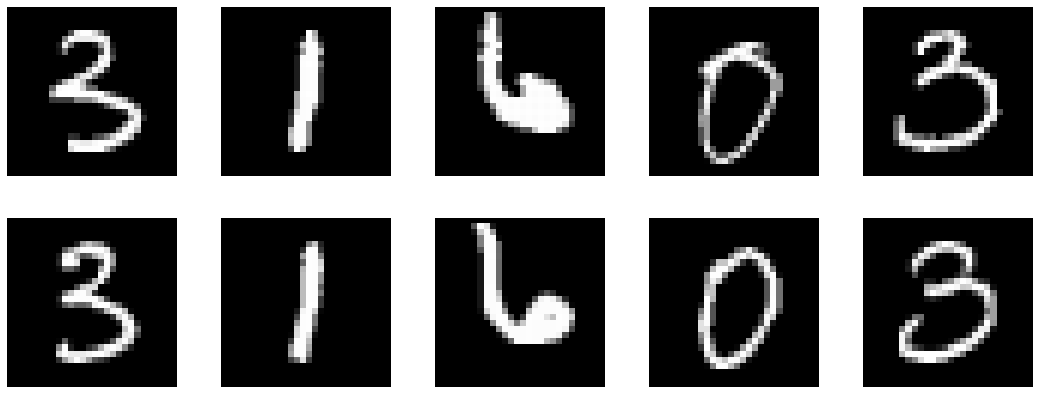

In [47]:
nn = np.argmin(dists, axis=1)
fig, axs = plt.subplots(2,5,figsize=(15,6))
images = np.random.choice(NUM_TEST, 5)
plt.tight_layout()
for i in range(5):
    axs[0,i].imshow(test[images[i]].reshape(28,28), cmap='gray')
    axs[1,i].imshow(train[nn[images[i]]].reshape(28,28), cmap='gray')
    axs[0,i].axis('off')
    axs[1,i].axis('off')
    
plt.show()